# YOLO v3 Object Detection

In [1]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO
import matplotlib.pyplot as plt

In [2]:
def process_image(img):
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [46]:
def draw(image, boxes, scores, classes, all_classes):
    
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (0,255,255), 3)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (255,255, 255), 2,
                    cv2.LINE_AA)

        print('class: {0}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [47]:
def detect_image(image, yolo, all_classes):
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    print(classes)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [48]:
def detect_video(video_path, yolo, all_classes):
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [49]:
yolo = YOLO(0.1, 0.5)
file = 'DATA/coco_classes.txt'

#Loading the classes
with open(file) as f:
    class_names = f.readlines()
all_classes = [c.strip() for c in class_names]

### Detecting Images

1/1 [==============================] - 1s 582ms/step
[16  1  7]
time: 0.62s
class: dog
box coordinate x,y,w,h: [124.17586899 220.45438957 195.27513885 321.88290024]
class: bicycle
box coordinate x,y,w,h: [119.11408997 118.67357826 448.81013489 321.92300034]
class: truck
box coordinate x,y,w,h: [468.69337463  84.47204876 227.28774261  83.50850487]



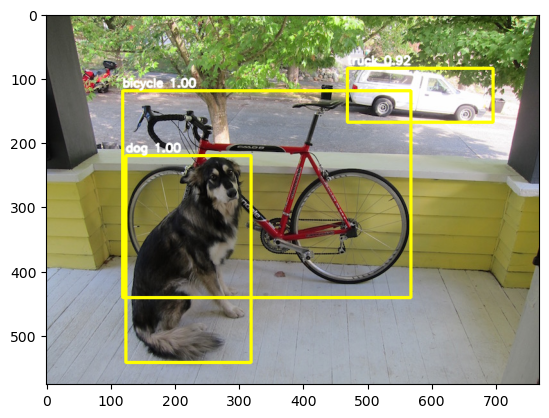

In [50]:
image = cv2.imread('./data/test_images/dog.jpg')
image = detect_image(image, yolo, all_classes)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

1/1 [==============================] - 0s 249ms/step
[0 1 1 2 2 2]
time: 0.27s
class: person
box coordinate x,y,w,h: [ 59.13411255 266.56857678  94.75638029 158.71025079]
class: bicycle
box coordinate x,y,w,h: [196.24228907 328.54420388  59.44734719  81.66356581]
class: bicycle
box coordinate x,y,w,h: [ 73.75541997 343.12756491  64.94437884  86.82981563]
class: car
box coordinate x,y,w,h: [539.19476688 309.15734357 184.95858786 111.91003548]
class: car
box coordinate x,y,w,h: [399.51638842 309.97790158  87.08287549  59.06403463]
class: car
box coordinate x,y,w,h: [457.5312134  310.93047774  96.70191751  66.10663971]



(-0.5, 801.5, 542.5, -0.5)

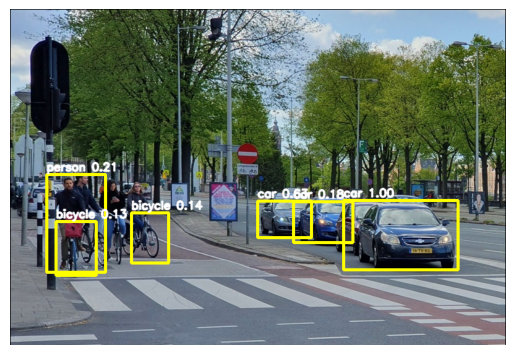

In [51]:
image = cv2.imread('./data/test_images/testimage1.png', cv2.COLOR_BGR2RGB)
image = detect_image(image, yolo, all_classes)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off') 

### Detecting on Video

In [52]:
video = 'data/test_images/video1.mp4'
detect_video(video, yolo, all_classes)

OpenCV: FFMPEG: tag 0x6765706d/'mpeg' is not supported with codec id 2 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


1/1 [==============================] - 0s 244ms/step
[16]
time: 0.26s
class: dog
box coordinate x,y,w,h: [196.08474374  79.03955269 205.92076635 226.96252441]

1/1 [==============================] - 0s 216ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [195.75035286  80.05377817 206.59899759 225.76792431]

1/1 [==============================] - 0s 231ms/step
[16]
time: 0.26s
class: dog
box coordinate x,y,w,h: [194.77197623  81.92574692 207.82695067 223.33039856]

1/1 [==============================] - 0s 226ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [194.69776583  82.80585051 209.07396257 222.15710735]

1/1 [==============================] - 0s 230ms/step
[16]
time: 0.26s
class: dog
box coordinate x,y,w,h: [195.04739666  82.26281404 208.23462832 223.50056934]

1/1 [==============================] - 0s 218ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [194.88806987  83.41938257 208.77918136 221.51227283]

1/1 [==============================] - 0

1/1 [==============================] - 0s 221ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [195.4408468  104.89579868 189.81156659 196.36418724]

1/1 [==============================] - 0s 216ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [197.10558975 104.67978573 185.91461444 196.67100334]

1/1 [==============================] - 0s 224ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [199.52634454 103.80244589 184.39809692 198.43553638]

1/1 [==============================] - 0s 319ms/step
[16]
time: 0.35s
class: dog
box coordinate x,y,w,h: [199.52460384 104.37568331 184.81357217 197.80528164]

1/1 [==============================] - 0s 225ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [200.08201671 104.82897806 182.2257818  197.50471401]

1/1 [==============================] - 0s 227ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [200.67463422 105.12367773 179.70088732 196.26455212]

1/1 [==============================] - 0

1/1 [==============================] - 0s 216ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [217.90597773 115.56622982 153.589926   190.44984627]

1/1 [==============================] - 0s 215ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [219.8783617  117.12244034 147.77889425 188.4160881 ]

1/1 [==============================] - 0s 226ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [220.61112285 115.72164059 148.64671016 190.46474648]

1/1 [==============================] - 0s 230ms/step
[16]
time: 0.26s
class: dog
box coordinate x,y,w,h: [209.68967092 103.81562376 183.18065906 190.446702  ]

1/1 [==============================] - 0s 465ms/step
[16]
time: 0.50s
class: dog
box coordinate x,y,w,h: [205.85323453  99.42476892 180.22156799 201.14433002]

1/1 [==============================] - 0s 288ms/step
[16]
time: 0.32s
class: dog
box coordinate x,y,w,h: [213.82738948 115.66828823 162.05351794 189.06596947]

1/1 [==============================] - 0

1/1 [==============================] - 0s 371ms/step
[16]
time: 0.40s
class: dog
box coordinate x,y,w,h: [225.52265096 139.32432032 157.49460471 164.62492275]

1/1 [==============================] - 0s 259ms/step
[16]
time: 0.28s
class: dog
box coordinate x,y,w,h: [227.44913745 136.5387125  162.00985849 169.49414635]

1/1 [==============================] - 0s 259ms/step
[16]
time: 0.28s
class: dog
box coordinate x,y,w,h: [225.00047827 119.13045359 165.90705931 185.51365185]

1/1 [==============================] - 0s 222ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [222.66812587 120.69374371 163.58859694 182.58882523]

1/1 [==============================] - 0s 251ms/step
[16]
time: 0.28s
class: dog
box coordinate x,y,w,h: [223.11292648 140.18124247 164.26736104 163.91187572]

1/1 [==============================] - 0s 227ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [223.48547053 142.07777452 161.90072763 159.92034245]

1/1 [==============================] - 0

1/1 [==============================] - 0s 237ms/step
[16]
time: 0.26s
class: dog
box coordinate x,y,w,h: [232.0106262  101.10277462 127.21503639 202.10729599]

1/1 [==============================] - 0s 215ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [231.92900896 103.16953754 129.46109122 200.50924873]

1/1 [==============================] - 0s 224ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [232.70276523 102.9385643  123.5407421  200.95072746]

1/1 [==============================] - 0s 257ms/step
[16]
time: 0.28s
class: dog
box coordinate x,y,w,h: [233.22243345 107.59002256 124.52569962 202.48050213]

1/1 [==============================] - 0s 247ms/step
[16]
time: 0.27s
class: dog
box coordinate x,y,w,h: [233.89430583 107.21424294 124.13716072 203.18792152]

1/1 [==============================] - 0s 258ms/step
[16]
time: 1.11s
class: dog
box coordinate x,y,w,h: [234.16466403 107.53671026 122.2272197  202.77390003]

1/1 [==============================] - 0

1/1 [==============================] - 0s 224ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [223.75620174 103.68546724 131.75642723 218.60216618]

1/1 [==============================] - 0s 228ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [224.93982041 101.07345486 129.80206299 222.68588448]

1/1 [==============================] - 0s 235ms/step
[16]
time: 0.26s
class: dog
box coordinate x,y,w,h: [223.23138249 105.95396376 132.79549724 213.32324696]

1/1 [==============================] - 0s 221ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [222.51814198 107.0115881  132.73039883 212.83736801]

1/1 [==============================] - 0s 219ms/step
[16]
time: 0.24s
class: dog
box coordinate x,y,w,h: [224.14949203 105.60155582 128.76187396 214.76402092]

1/1 [==============================] - 0s 218ms/step
[16]
time: 0.25s
class: dog
box coordinate x,y,w,h: [224.80647969 110.85871553 129.53923595 207.15247822]

1/1 [==============================] - 0